In [6]:
!pip install plotly

^C


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   -- ------------------------------------- 1.0/19.1 MB 4.2 MB/s eta 0:00:05
   --- ------------------------------------ 1.8/19.1 MB 4.0 MB/s eta 0:00:05
   ------ --------------------------------- 2.9/19.1 MB 4.0 MB/s eta 0:00:05
   ------- -------------------------------- 3.7/19.1 MB 4.0 MB/s eta 0:00:04
   --------- ------------------------------ 4.5/19.1 MB 3.9 MB/s eta 0:00:04
   ----------- ---------------------------- 5.5/19.1 MB 3.9 MB/s eta 0:00:04
   ------------ --------------------------- 6.0/19.1 MB 4.0 MB/s eta 0:00:04
   -------------- ------------------------- 7.1/19.1 MB 3.9 MB/s eta 0:00:04
   ---------------- ----------------------- 7.9/19.1 MB 3.9 MB/s eta 0:00:03
   ------------------ --------------------- 8.7/19.1 MB 3.9 MB/s eta 0:00:03
   ------------------- -------------------- 9.4/19.1 MB 3.9 MB/s eta 0:00:03
   ----------

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('cleaned_dataset.csv')

In [3]:
df

,Age,Gender,Ethnicity,EducationLevel,Smoking,PhysicalActivity,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73.0,0.0,0,2.0,0.0,6.327112,9.025679,0.0,0.0,1.0,...,6.518877,0.0,0.0,1.725883,0.0,0.0,0.0,1.0,0.0,0
1,89.0,0.0,0,0.0,0.0,7.619885,7.151293,0.0,0.0,0.0,...,7.118696,0.0,0.0,2.592424,0.0,0.0,0.0,0.0,1.0,0
2,73.0,0.0,3,1.0,0.0,7.844988,9.673574,1.0,0.0,0.0,...,5.895077,0.0,0.0,7.119548,0.0,1.0,0.0,1.0,0.0,0
3,74.0,1.0,0,1.0,1.0,8.428001,8.392554,0.0,0.0,0.0,...,8.965106,0.0,1.0,6.481226,0.0,0.0,0.0,0.0,0.0,0
4,89.0,0.0,0,0.0,0.0,6.310461,5.597238,0.0,0.0,0.0,...,6.045039,0.0,0.0,0.014691,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,61.0,0.0,0,1.0,0.0,4.049964,7.535540,0.0,0.0,0.0,...,0.238667,0.0,0.0,4.492838,1.0,0.0,0.0,0.0,0.0,1
2145,75.0,0.0,0,2.0,0.0,1.360667,8.555256,0.0,0.0,0.0,...,8.687480,0.0,1.0,9.204952,0.0,0.0,0.0,0.0,0.0,1
2146,77.0,0.0,0,1.0,0.0,9.886002,5.769464,0.0,0.0,0.0,...,1.972137,0.0,0.0,5.036334,0.0,0.0,0.0,0.0,0.0,1
2147,78.0,1.0,3,1.0,0.0,6.354282,8.322874,0.0,1.0,0.0,...,5.173891,0.0,0.0,3.785399,0.0,0.0,0.0,0.0,1.0,1


In [4]:
x = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42,test_size=0.3,stratify=y)

In [6]:
print("Train Shape:", X_train.shape, y_train.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (1504, 25) (1504,)
Test set Shape: (645, 25) (645,)


In [7]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,Age,Gender,Ethnicity,EducationLevel,Smoking,PhysicalActivity,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
0,-0.639700,0.993373,-0.689938,-0.323251,1.565101,-0.560856,-0.024234,-0.580421,-0.395011,-0.431416,...,-1.459487,-0.746735,-0.510576,-0.411725,1.358134,-0.506433,-0.424893,2.377996,-0.41833,1.540194
1,1.251368,0.993373,0.318484,1.906887,-0.638936,1.384660,-0.312206,1.722886,2.531574,-0.431416,...,-0.435403,0.142512,1.958574,2.428803,1.361337,-0.506433,-0.424893,-0.420522,-0.41833,-0.649269
2,1.251368,-1.006671,1.326906,-0.323251,-0.638936,0.581599,1.473980,1.722886,-0.395011,-0.431416,...,0.680972,0.151861,-0.510576,-0.411725,-1.609664,-0.506433,-0.424893,-0.420522,-0.41833,1.540194
3,-1.418374,-1.006671,-0.689938,-0.323251,-0.638936,0.607305,1.205303,-0.580421,-0.395011,-0.431416,...,-0.942764,-0.757939,-0.510576,-0.411725,-1.114350,-0.506433,-0.424893,2.377996,-0.41833,1.540194
4,-0.639700,0.993373,-0.689938,-1.438321,-0.638936,-1.296203,0.536529,-0.580421,2.531574,-0.431416,...,0.868513,-0.060788,-0.510576,-0.411725,-0.395465,1.974594,-0.424893,-0.420522,-0.41833,-0.649269


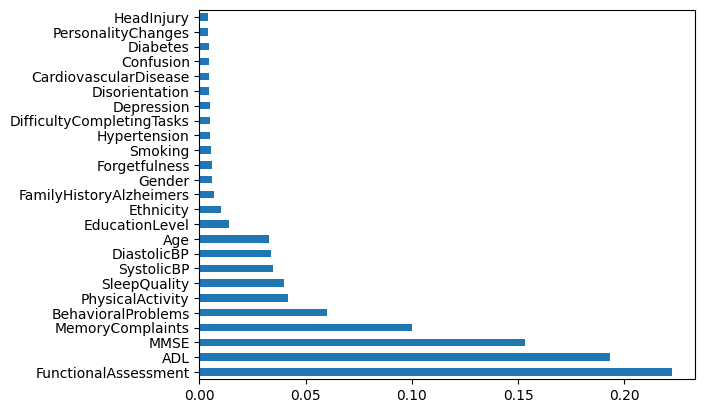

In [21]:
#import libraries
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
#Fit the model
model = RandomForestClassifier()
model.fit(x,y)
#plot graph of feature importances
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(36).plot(kind='barh')
plt.show()

In [22]:
# Apply smoten on X_train and y_train

from imblearn.combine import SMOTEENN
from collections import Counter

# Initialize the SMOTEENN object
smote_enn = SMOTEENN(random_state=42)

# Apply the SMOTEENN to balance the dataset
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Print the class distribution before and after resampling
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

print("X_train_resampled shape:", X_resampled.shape)
print("y_train_resampled shape:", y_resampled.shape)


Original class distribution: Counter({0: 972, 1: 532})
Resampled class distribution: Counter({1: 679, 0: 424})
X_train_resampled shape: (1103, 25)
y_train_resampled shape: (1103,)


In [20]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 2.1/124.9 MB 3.9 MB/s eta 0:00:32
    --------------------------------------- 2.9/124.9 MB 4.0 MB/s eta 0:00:31
   - -------------------------------------- 3.7/124.9 MB 4.0 MB/s eta 0:00:31
   - -------------------------------------- 4.5/124.9 MB 3.9 MB/s eta 0:00:31
   - -------------------------------------- 5.5/124.9 MB 3.9 MB/s eta 0:00:31
   -- ------------------------------------- 6.3/124.9 MB 3.9 MB/s eta 0:00:31
   -- ------------------------------------- 7.1/124.9 MB 3.9 MB/s eta 0:00:30
   -- ------------------------------------- 7.9/124.9 MB 3.9 MB/s eta 0:00:30
   -- ------------------------------------- 8.7/124.9 MB 3.9 MB/s eta 0:00:30
   --- ------------------------------------ 9.4/124.9 MB 3.9 MB/s eta 0:00:30


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(), 
    "SVR": SVC(),
    "XGBoost": XGBClassifier()
}
# Hyperparameter Grids (Example - Customize for each model)
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Decision Tree': {'max_depth': [None, 5, 10]},
    'SVR': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}
# Cross-validation strategy

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model Evaluation and Selection
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"{name}: Best Parameters - {grid_search.best_params_}, Best Score - {grid_search.best_score_}")

Logistic Regression: Best Parameters - {'C': 10}, Best Score - 0.836436323366556
Decision Tree: Best Parameters - {'max_depth': 5}, Best Score - 0.9408217054263565
KNN: Best Parameters - {'n_neighbors': 7}, Best Score - 0.7566356589147287
SVR: Best Parameters - {'C': 10, 'kernel': 'linear'}, Best Score - 0.8344407530454042
XGBoost: Best Parameters - {'learning_rate': 0.01, 'n_estimators': 200}, Best Score - 0.9494750830564783


In [29]:
# Evaluate Best Models on Test Set
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, digits=4)
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}")

--- Logistic Regression ---
Accuracy: 0.8418604651162791
Classification Report:
              precision    recall  f1-score   support

           0     0.8689    0.8897    0.8791       417
           1     0.7890    0.7544    0.7713       228

    accuracy                         0.8419       645
   macro avg     0.8289    0.8220    0.8252       645
weighted avg     0.8406    0.8419    0.8410       645

--- Decision Tree ---
Accuracy: 0.9348837209302325
Classification Report:
              precision    recall  f1-score   support

           0     0.9496    0.9496    0.9496       417
           1     0.9079    0.9079    0.9079       228

    accuracy                         0.9349       645
   macro avg     0.9288    0.9288    0.9288       645
weighted avg     0.9349    0.9349    0.9349       645

--- KNN ---
Accuracy: 0.7596899224806202
Classification Report:
              precision    recall  f1-score   support

           0     0.7707    0.8945    0.8280       417
           1     0.

In [32]:
model = XGBClassifier()
print(f'Using model: XGBR ')

# Fit the model
model.fit(X_train, y_train)

# Training and Test Scores
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Training Score (Accuracy): {train_score}')
print(f'Test Score (Accuracy): {test_score}')

# Predictions on the test set
y_pred = model.predict(X_test)

# Detailed classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('-' * 30)

Using model: XGBR 
Training Score (Accuracy): 1.0
Test Score (Accuracy): 0.9441860465116279
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       417
           1       0.92      0.92      0.92       228

    accuracy                           0.94       645
   macro avg       0.94      0.94      0.94       645
weighted avg       0.94      0.94      0.94       645

Confusion Matrix:
[[400  17]
 [ 19 209]]
------------------------------


<Axes: >

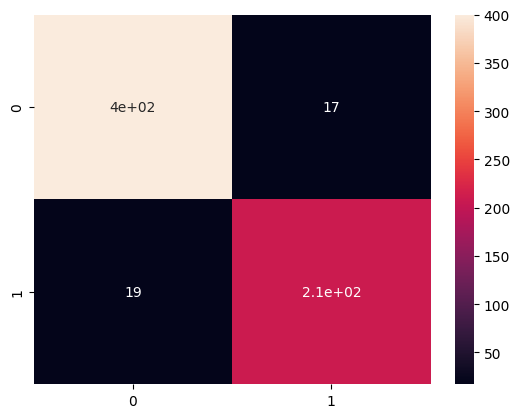

In [33]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True)

In [17]:
import joblib
joblib.dump(model, 'XGBR.h5')
joblib.dump(scaler, 'scaler.h5')


['scaler.h5']